In [1]:
! pip install --quiet llama-index llama-index-llms-openai openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Loading Data

[Ingestion](https://docs.llamaindex.ai/en/stable/understanding/loading/loading.html)

This ingestion pipeline typically consists of three main stages:

1. Load the data.

2. Transform the data.

3. Index and store the data.

## Loading using SimpleDirectoryReader
The easiest reader to use is our SimpleDirectoryReader, which creates documents out of every file in a given directory.

It is built in to LlamaIndex and can read a variety of formats including Markdown, PDFs, Word documents, PowerPoint decks, images, audio and video.


## Transformations
After the data is loaded, you then need to process and transform your data before putting it into a storage system.

These transformations include chunking, extracting metadata, and embedding each chunk. This is necessary to make sure that the data can be retrieved, and used optimally by the LLM.

Transformation input/outputs are **Node objects** (a Document is a subclass of a Node). Transformations can also be stacked and reordered.

We have both a high-level and lower-level API for transforming documents.


### High-Level Transformation API
Indexes have a ```.from_documents()``` method which accepts an array of Document objects and will correctly parse and chunk them up.

### Lower-Level Transformation API
You can do this by either using our transformation modules (text splitters, metadata extractors, etc.) as standalone components, or compose them in our declarative **Transformation Pipeline interface.**

LlamaIndex has support for a wide range of text splitters, ranging from paragraph/sentence/token based splitters to file-based splitters like HTML, JSON.


# Node Parser Usage Pattern

[Node Parser Usage Pattern](https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/root.html)


### Modules: Node Parser Modules
1. File-Based Node Parsers.
2. Text-Splitters.
3. Relation-Based Node Parsers.

[Node Parser Modules](https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/modules.html)

# Prompt
[Prompts](https://docs.llamaindex.ai/en/stable/module_guides/models/prompts.html)

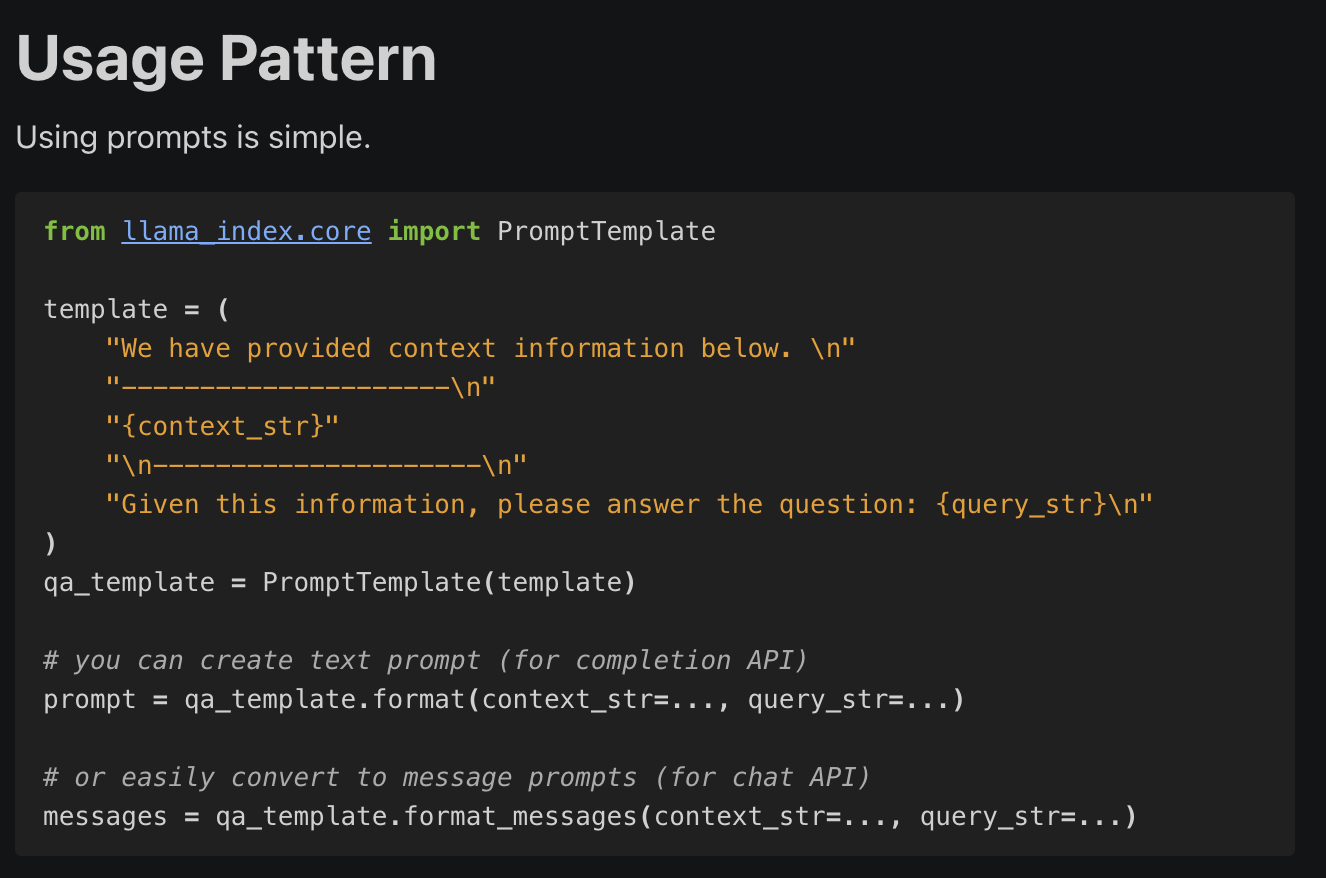

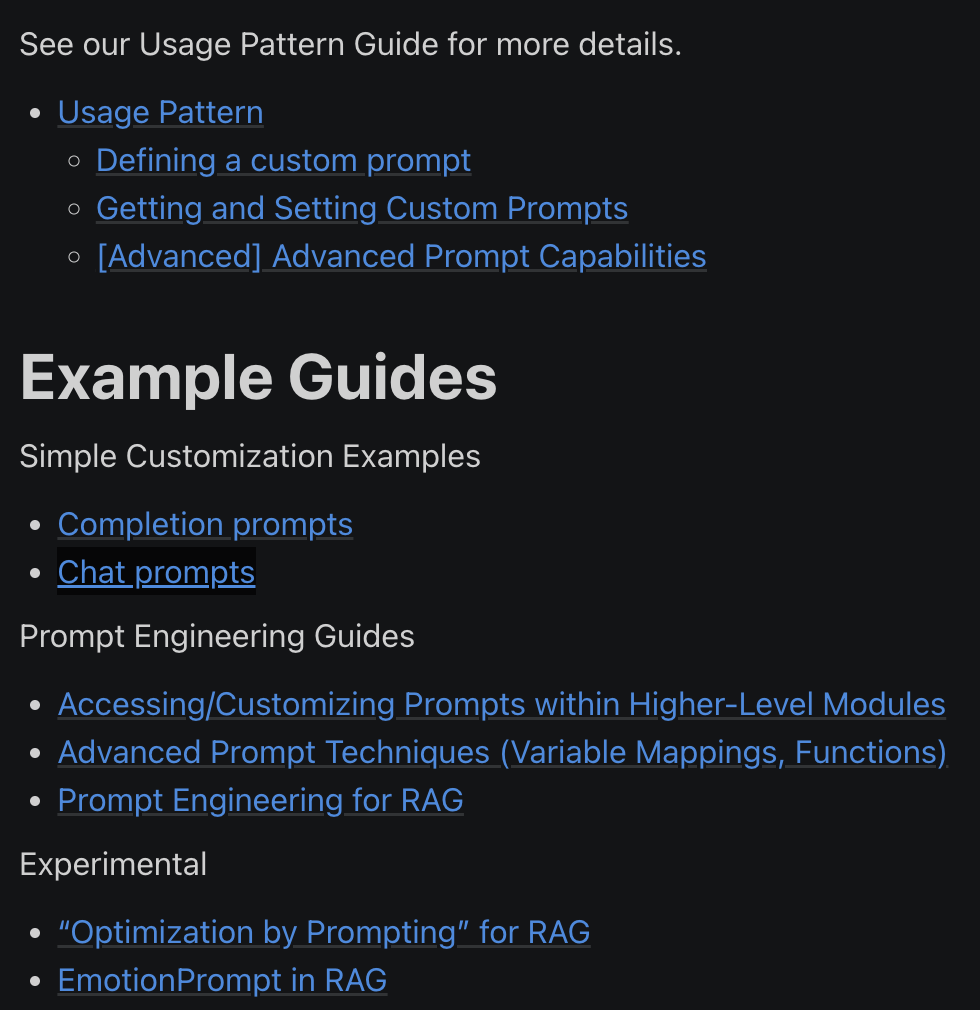

In [6]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [8]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.core import PromptTemplate

In [7]:
dir_path = '/content/drive/MyDrive/Colab_Notebooks/GenerativeAI/LLamaIndex_Langchain/simpleApplication/data'
documents = SimpleDirectoryReader(dir_path).load_data()
index = VectorStoreIndex.from_documents(documents)

In [9]:
template = (
    "We have provided context information below. \n"
    "---------------------\n"
    "{context_str}"
    "\n---------------------\n"
    "Given this information, please answer the question: {query_str}\n"
)

In [10]:
prompt = PromptTemplate(template=template)

### Commonly Used Prompts
The most commonly used prompts will be the text_qa_template and the refine_template.

1. text_qa_template - used to get an initial answer to a query using retrieved nodes

2. refine_template - used when the retrieved text does not fit into a single LLM call with response_mode="compact" (the default), or when more than one node is retrieved using response_mode="refine". The answer from the first query is inserted as an existing_answer, and the LLM must update or repeat the existing answer based on the new context.

In [11]:
query_engine = index.as_query_engine(text_qa_template=prompt)

In [12]:
response = query_engine.query('What is yolo world?')

In [13]:
from llama_index.core.response.pprint_utils import pprint_response
pprint_response(response=response)

Final Response: YOLO-World is an innovative approach that enhances
YOLO (You Only Look Once) detectors with open-vocabulary detection
capabilities through vision-language modeling and pre-training on
large-scale datasets. It introduces a new Re-parameterizable Vision-
Language Path Aggregation Network (RepVL-PAN) and region-text
contrastive loss to facilitate the interaction between visual and
linguistic information. YOLO-World excels in detecting a wide range of
objects in a zero-shot manner with high efficiency and has achieved
high performance on challenging datasets like LVIS. It has also been
continuously improved with updates such as high-resolution support,
higher accuracy, and faster speed versions.


## Chat Prompts Customization.

[Chat Prompts Customization](https://docs.llamaindex.ai/en/stable/examples/customization/prompts/chat_prompts.html)

There are two ways of setting up the prompts:

1. Explicitly define ChatMessage and MessageRole objects.

2. Call ChatPromptTemplate.from_messages



In [14]:
dir_path = '/content/drive/MyDrive/Colab_Notebooks/GenerativeAI/LLamaIndex_Langchain/simpleApplication/data'
documents = SimpleDirectoryReader(dir_path).load_data()
index = VectorStoreIndex.from_documents(documents)

1. Explicitly Define ChatMessage and MessageRole objects

In [22]:
from llama_index.core.llms import ChatMessage, MessageRole
from llama_index.core import ChatPromptTemplate

In [23]:
qa_prompt_str = (
    "Context information is below.\n"
    "---------------------\n"
    "{context_str}\n"
    "---------------------\n"
    "Given the context information and not prior knowledge, "
    "answer the question: {query_str}\n"
)


In [24]:
# Text QA Prompt
chat_text_qa_msgs = [
    ChatMessage(
        role=MessageRole.SYSTEM,
        content=(
            "Always answer the question, even if the context isn't helpful."
        ),
    ),
    ChatMessage(
        role=MessageRole.USER,
        content=qa_prompt_str
        ),
]


text_qa_template = ChatPromptTemplate(chat_text_qa_msgs)

In [25]:
refine_prompt_str = (
    "We have the opportunity to refine the original answer "
    "(only if needed) with some more context below.\n"
    "------------\n"
    "{context_msg}\n"
    "------------\n"
    "Given the new context, refine the original answer to better "
    "answer the question: {query_str}. "
    "If the context isn't useful, output the original answer again.\n"
    "Original Answer: {existing_answer}"
)

In [26]:
# Refine Prompt
chat_refine_msgs = [
    ChatMessage(
        role=MessageRole.SYSTEM,
        content=(
            "Always answer the question, even if the context isn't helpful."
        ),
    ),
    ChatMessage(
        role=MessageRole.USER,
        content=refine_prompt_str
        ),
]



refine_template = ChatPromptTemplate(chat_refine_msgs)

In [27]:
query_engine = index.as_query_engine(
    text_qa_template=text_qa_template,
    refine_template=refine_template,
)

In [28]:
response = query_engine.query("what is the difference between yolov8, yolov9 and yoloworld")

In [29]:
pprint_response(response=response)

Final Response: Based on the provided context information, the main
differences between YOLOv8, YOLOv9, and YOLOworld are as follows:  1.
YOLOv8:    - YOLOv8 has 16% more parameters and 27% more calculations
compared to YOLOv9-E.    - YOLOv8 has a lower average precision (AP)
compared to YOLOv9.  2. YOLOv9:    - YOLOv9 has about 10% less
parameters and 5 ∼15% less calculations compared to YOLO MS.    -
YOLOv9 has a 0.4 ∼0.6% improvement in AP compared to YOLO MS.    -
YOLOv9-C has 42% less parameters and 22% less calculations compared to
YOLOv7 AF.    - YOLOv9-E has significant improvement of 1.7% AP
compared to YOLOv8-X.    - YOLOv9 shows significant improvements in
all aspects compared to existing methods.  3. YOLOworld:    - There is
no specific information provided about YOLOworld in the context.
